In [128]:
# The file is a stock data from one of the of nifty 50
# The selected stock is ADANI PORTS AND SPECIAL ECONOMIC ZONE LIMITED

import pandas as pd

df= pd.read_excel('ADANI PORTS AND SPECIAL ECONOMIC ZONE LIMITED.xlsx')
df.head(3)
# Importing the data to jupyter notebook using pandas

,Date,Price,Open,High,Low,Volume,Chg%
0,"Apr 24, 2023",671.3,665.6,672.45,656.00,3.35M,0.0147
1,"Apr 21, 2023",661.6,668.0,670.60,658.65,1.98M,-0.0068
2,"Apr 20, 2023",666.1,663.0,678.50,661.20,5.01M,0.0117


In [129]:
# Checking the details and found that the date is not in datetime, but how ever i dont need it in Linear Regression
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3782 entries, 0 to 3781
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3782 non-null   object 
 1   Price   3782 non-null   float64
 2   Open    3782 non-null   float64
 3   High    3782 non-null   float64
 4   Low     3782 non-null   float64
 5   Volume  3782 non-null   object 
 6   Chg%    3782 non-null   float64
dtypes: float64(5), object(2)
memory usage: 207.0+ KB


In [130]:
# checking the shape of DataFrame
df.shape

(3782, 7)

In [131]:
# removing date column, Chg% and Volumn

df = df.drop(['Date','Chg%','Volume'], axis = 1)
df.head(3)

,Price,Open,High,Low
0,671.3,665.6,672.45,656.00
1,661.6,668.0,670.60,658.65
2,666.1,663.0,678.50,661.20


In [132]:
# Confirming the Changes done
df.shape

(3782, 4)

In [133]:
# Checking the null values
df.isnull().sum()

Price    0
Open     0
High     0
Low      0
dtype: int64

In [134]:
# Checking for any duplicates
df.duplicated().sum()

0

In [135]:
# Checking the Statistical summary of the dataframe
df.describe()

,Price,Open,High,Low
count,3782.000000,3782.000000,3782.000000,3782.000000
mean,309.658823,310.220645,315.302221,304.380814
std,210.218301,210.750007,213.532798,207.239531
min,51.590000,51.400000,52.510000,50.730000
25%,143.612500,143.725000,146.662500,140.700000
50%,270.125000,271.075000,275.000000,265.000000
75%,380.050000,380.775000,385.375000,375.475000
max,970.250000,974.200000,987.850000,967.000000


# Visualising the existing data

In [136]:
df.corr()

,Price,Open,High,Low
Price,1.000000,0.999162,0.999592,0.999596
Open,0.999162,1.000000,0.999627,0.999390
High,0.999592,0.999627,1.000000,0.999245
Low,0.999596,0.999390,0.999245,1.000000


In [137]:
import seaborn as sns

<AxesSubplot:>

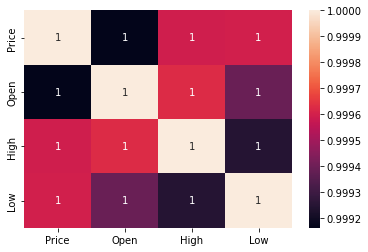

In [138]:
sns.heatmap(df.corr(), annot = True)
# all the data is highly corelative to all the other variables
# it is over fitted model

# Linear Regression 

In [139]:
# separating the predictors and target variables

y = df['Price']
X = df.drop('Price', axis = 1)

##  Splitting the Data to train and test using sklearn.model_selection


In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 20)

In [141]:
# Checking the shape and columns in the new dataset
X_train

,Open,High,Low
3049,150.50,152.40,148.50
2101,270.05,271.40,269.05
1601,299.70,301.90,287.10
1163,403.50,406.40,395.30
443,724.00,728.00,709.10
...,...,...,...
2972,145.90,147.85,144.20
3295,111.40,111.88,109.60
271,730.50,743.80,729.55
2522,149.80,153.40,146.45


## Fitting the linear regression algorithm using sklearn.linear_model


In [142]:
from sklearn.linear_model import LinearRegression

In [143]:
lr = LinearRegression()

In [144]:
# training the model
lr.fit(X_train, y_train)

LinearRegression()

In [145]:
# predicting the model
y_pred = lr.predict(X_test)
y_pred

array([294.64224994, 727.93192903, 156.19951234, ..., 145.98370669,
       364.28671571, 372.04016751])

## Visual understanding of the predicted and the actual data of the test


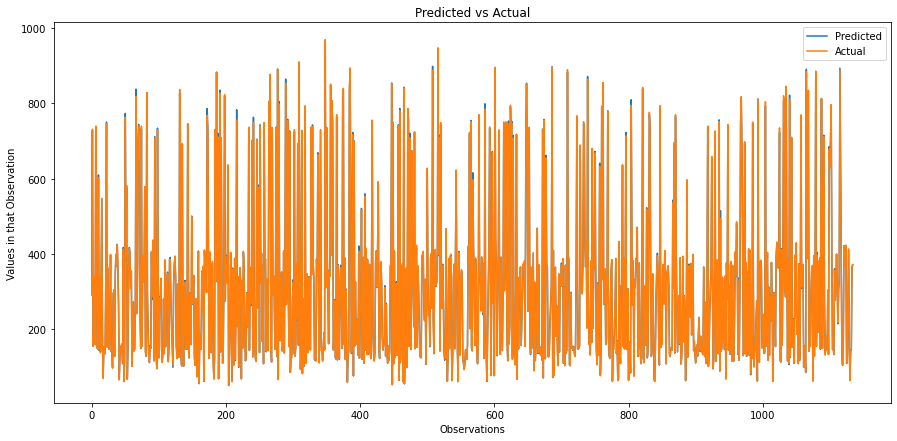

In [146]:

import matplotlib.pyplot as plt

x_range = [i for i in range(len(y_test))]


plt.figure(figsize = (15,7))
plt.plot(x_range,y_pred)
plt.plot(x_range, y_test)

plt.title('Predicted vs Actual')
plt.xlabel('Observations')
plt.ylabel('Values in that Observation')

plt.legend(['Predicted','Actual'])

## Reading using sklearn.metrics

In [147]:
from sklearn.metrics import r2_score, mean_squared_error

In [148]:
# r2_score to measure the performance of the Linear Regression model
print(r2_score(y_test,y_pred))

0.9997314245833089


In [149]:
# mean squared error is to find the difference between the predicted and actual values in a regression model
print(mean_squared_error(y_pred,y_test))

12.013131919763143


## Reading using statsmodel

In [150]:
import statsmodels.formula.api as smf
result = smf.ols(formula = 'Price ~ Open + High + Low',data = df).fit()

In [151]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.873e+06
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        10:57:12   Log-Likelihood:                -9970.9
No. Observations:                3782   AIC:                         1.995e+04
Df Residuals:                    3778   BIC:                         1.997e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1151      0.099     -1.167      0.2